In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV FILE FOR ML/haberman.csv')
df.shape

(305, 4)

Since the coloumn values are numerical, we change it into string values which easy to compute

In [ ]:
#Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.
#Here if patients survived 5 years or more is represented as 1 and patients
#who survived less than 5 years is represented as 2.
df = df.rename(columns={'':'index','30':'age', '64': 'oper_year','1':'axil_node','1.1':'survive_stat'})
df.head()

,age,oper_year,axil_node,survive_stat
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.head()

,age,oper_year,axil_node,survive_stat
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df['oper_year'].value_counts()

58    36
64    30
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: oper_year, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           305 non-null    int64
 1   oper_year     305 non-null    int64
 2   axil_node     305 non-null    int64
 3   survive_stat  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,age,oper_year,axil_node,survive_stat
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
df.columns

Index(['age', 'oper_year', 'axil_node', 'survive_stat'], dtype='object')

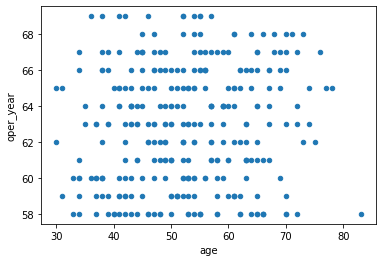

In [ ]:
df.plot(kind='scatter',x='age',y='oper_year')
plt.show()

In [ ]:
# taking random sample
df.sample(2)

,age,oper_year,axil_node,survive_stat
263,65,67,0,1
0,30,62,3,1


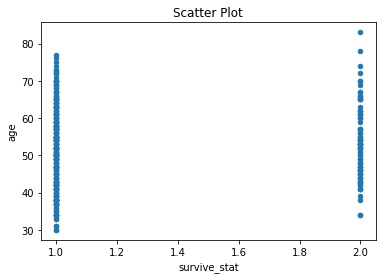

In [ ]:
df.plot(kind='scatter', x='survive_stat', y='age', title='Scatter Plot')
plt.show()

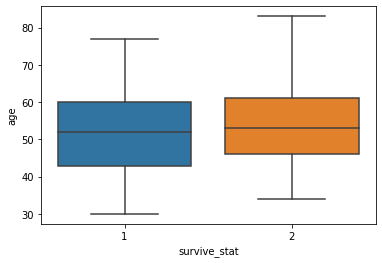

In [ ]:
import seaborn as sb
sb.boxplot(x='survive_stat',y='age',data=df)
plt.show()

In [ ]:
df.isnull().sum()  #null check

age             0
oper_year       0
axil_node       0
survive_stat    0
dtype: int64

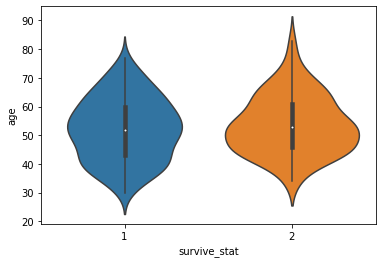

In [ ]:
#Violin Plot

sb.violinplot(x='survive_stat', y='age', data=df, size=8)
plt.show()

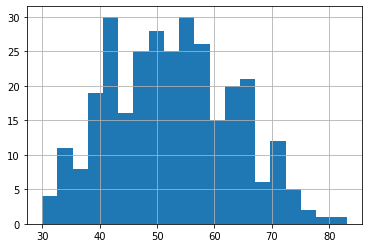

In [ ]:
df['age'].hist(bins=20,grid=True)
plt.show()

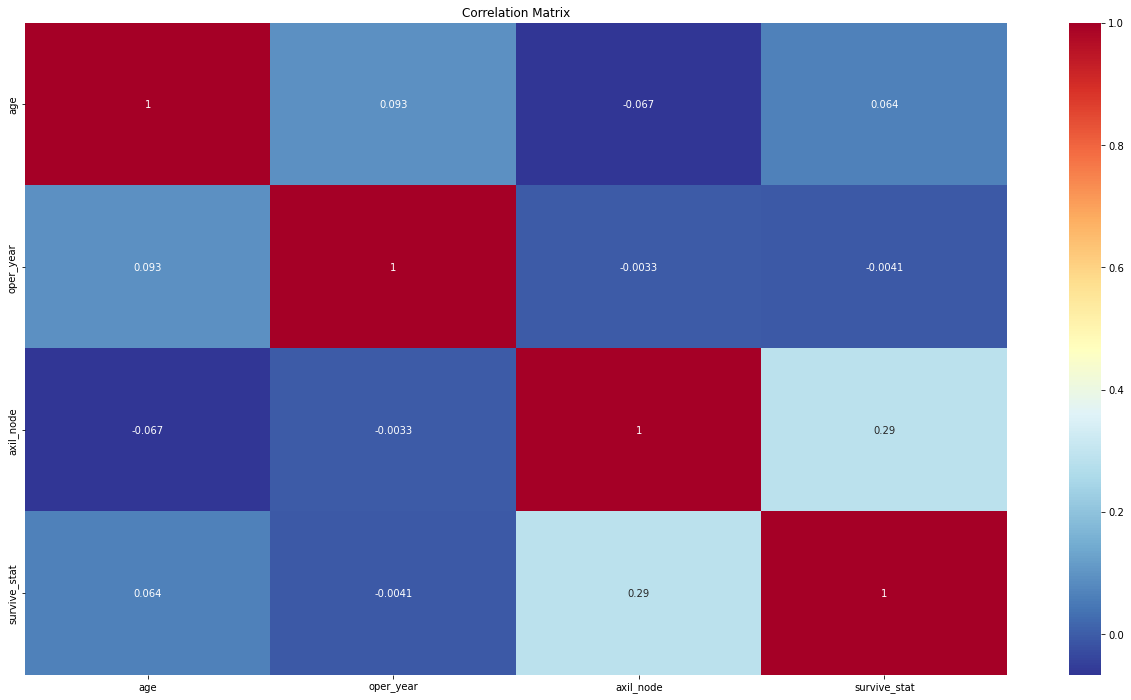

In [ ]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sb.heatmap(corr_mat, annot=True, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

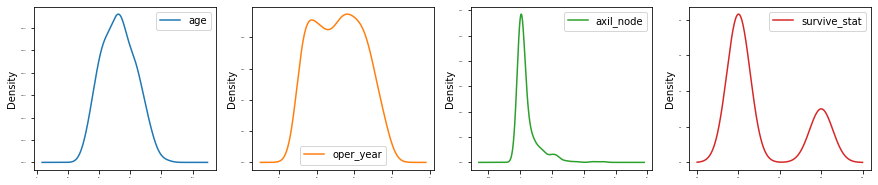

In [ ]:
#Checking the data distribution among the columns. 
df.plot(kind='density', subplots=True, layout=(1,4), sharex=False, legend=True, fontsize=2, figsize=(15,3))
plt.show()

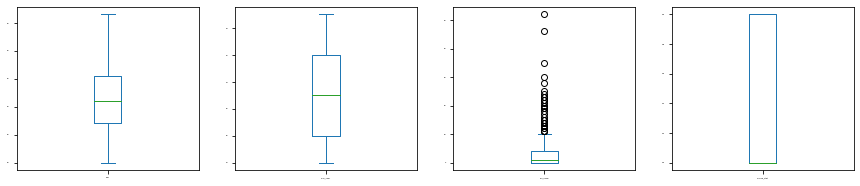

In [ ]:
df.plot(kind='box', subplots=True, layout=(1,4), sharex=False, legend=True, fontsize=2, figsize=(15,3))
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
survive_stat_transformed = le.fit_transform(df['survive_stat'])
df['survive_stat']=survive_stat_transformed
df.head()

,age,oper_year,axil_node,survive_stat
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0


##  **Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['survive_stat'])
y=df['survive_stat']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
len(X_train)

152

In [ ]:
len(y_train)

152

## **Data Processing**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df_train = scaler.fit_transform(X_train)
standard_df_test = scaler.transform(X_test)

##  **Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = LogisticRegression(C = i )
      bayes.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(standard_df_train)
      y_pred_test = bayes.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.75
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.756578947368421
Accuracy of testing data 0.738562091503268
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.7763157894736842
Accuracy of testing data 0.7450980392156863
--------------------------------------------------
---------------------------------------------

##  **SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      clf = svm.SVC(C = i)
      clf.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = clf.predict(standard_df_train)
      y_pred_test = clf .predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7254901960784313
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.7894736842105263
Accuracy of testing data 0.738562091503268
--------------------------------------------------
--------------------------------

##  **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
random= make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
random = RandomForestClassifier(max_depth=2, random_state=0)
random.fit(X_train, y_train)



RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
random.score(X_train, y_train)

0.7828947368421053

## **KNN**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = GaussianNB(var_smoothing = i )
      bayes.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(standard_df_train)
      y_pred_test = bayes.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)


 alpha = 0.0001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.75
Accuracy of testing data 0.738562091503268
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.75
Accuracy of testing data 0.7320261437908496
--------------------------------------------------
--------------------------------------------------
 alpha =

##  **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = GaussianNB(var_smoothing = i )
      bayes.fit(standard_df_train, y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(standard_df_train)
      y_pred_test = bayes.predict(standard_df_test)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.743421052631579
Accuracy of testing data 0.7516339869281046
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.75
Accuracy of testing data 0.738562091503268
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.75
Accuracy of testing data 0.7320261437908496
--------------------------------------------------
--------------------------------------------------
 alpha =